<a href="https://colab.research.google.com/github/rajskar/um_P710/blob/main/LinearRegression/LR_MSEvsMAE_NoOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated Coefficients (Gradient Descent with MAE):
  Intercept (beta_0): 4.2930
  Slope (beta_1): 2.6875
Calculated Coefficients:
  MSE Model: Intercept=4.2151, Slope=2.7701
  MAE Model: Intercept=4.2930, Slope=2.6875


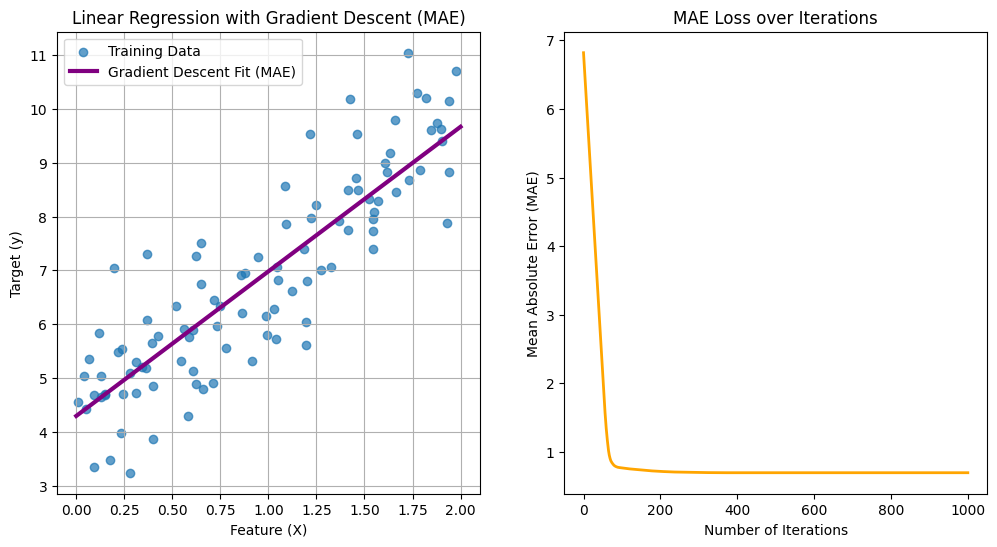

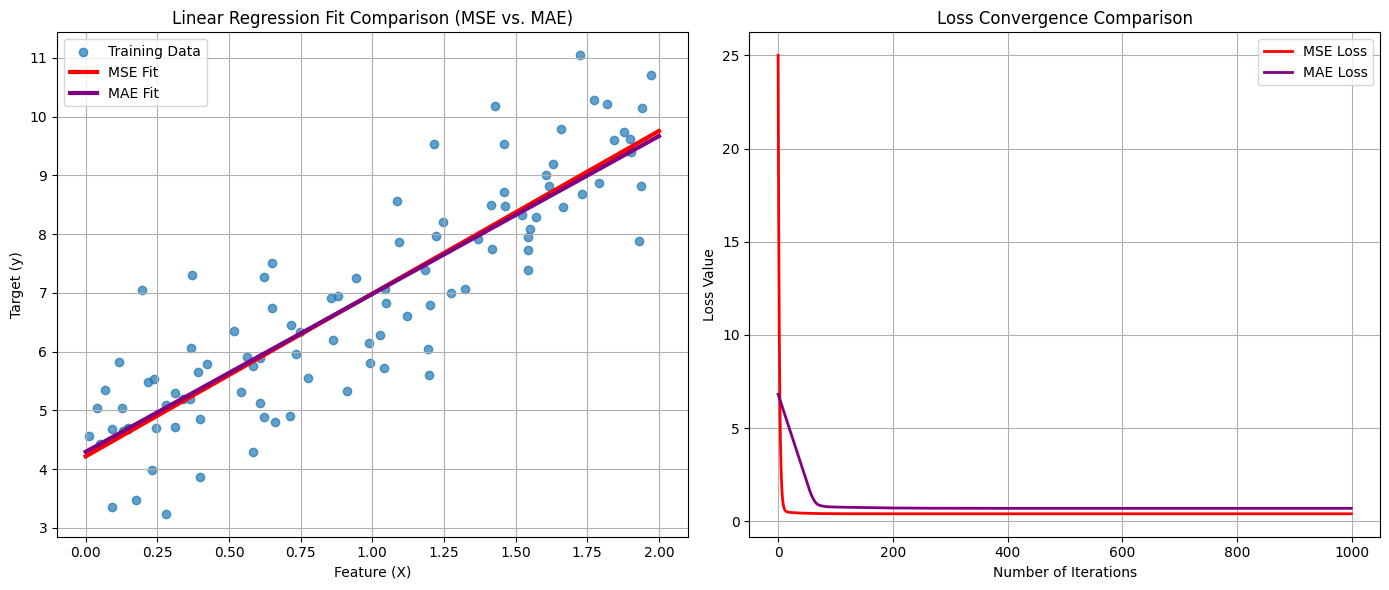

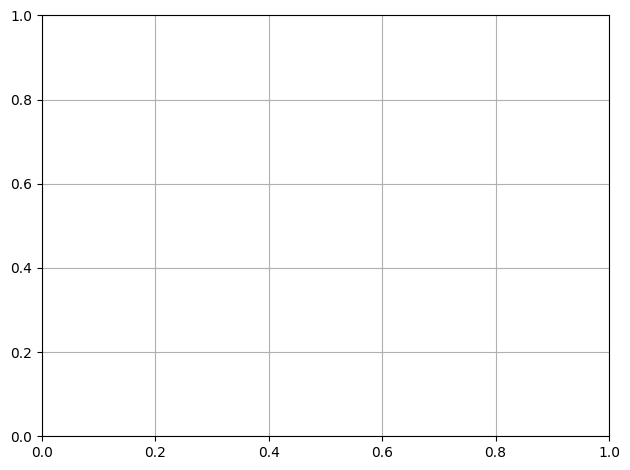

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define the Gradient Descent solver function ---
def gradient_descent_mae_solve(X, y, learning_rate=0.1, n_iterations=1000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Absolute Error (MAE).

    Args:
        X (np.array): The feature matrix of shape (m, n).
        y (np.array): The target vector of shape (m, 1).
        learning_rate (float): The size of the steps taken to update coefficients.
        n_iterations (int): The number of training iterations.

    Returns:
        tuple: A tuple containing the final coefficients (np.array)
               and a list of MAE values per iteration.
    """
    # Get the number of samples (m)
    m = X.shape[0]

    # Add a column of ones to X for the intercept term (beta_0).
    X_b = np.c_[np.ones((m, 1)), X]

    # Initialize the coefficients (beta) with zeros.
    # The shape is (n + 1, 1) for the intercept and n features.
    beta = np.zeros((X_b.shape[1], 1))

    # List to store the MAE for each iteration to track learning
    mae_history = []

    # Iterate a specified number of times to update the coefficients
    for iteration in range(n_iterations):
        # Calculate the predictions (y_pred)
        y_pred = X_b @ beta

        # Calculate the error (difference between prediction and actual)
        error = y_pred - y

        # Calculate the Mean Absolute Error (MAE) for the current iteration
        # Note: The absolute value is used instead of squaring.
        mae = np.sum(np.abs(error)) / m
        mae_history.append(mae)

        # Calculate the gradient of the MAE function with respect to the coefficients.
        # The derivative of the absolute error is the sign of the error.
        gradients = X_b.T @ np.sign(error) / m

        # Update the coefficients by moving in the opposite direction of the gradient
        beta = beta - learning_rate * gradients

    return beta, mae_history

# --- Step 2: Generate sample data ---
# This is the same data as before for comparison.
np.random.seed(42)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)

# --- Step 3: Solve for the coefficients using Gradient Descent with MAE ---
# We use a small learning rate to ensure we don't overshoot the minimum.
# The number of iterations is high enough to allow convergence.
beta_mae, mae_history = gradient_descent_mae_solve(X_train, y_train, learning_rate=0.05, n_iterations=1000)

# Check if the solution was successful
if beta_mae is not None:
    # Print the calculated coefficients
    intercept_mae = beta_mae[0][0]
    slope_mae = beta_mae[1][0]
    print(f"Calculated Coefficients (Gradient Descent with MAE):")
    print(f"  Intercept (beta_0): {intercept_mae:.4f}")
    print(f"  Slope (beta_1): {slope_mae:.4f}")

    # --- Step 4: Visualize the results ---

    # Plot the training data and the regression line
    X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
    y_pred_mae = intercept_mae + slope_mae * X_plot

    plt.figure(figsize=(12, 6))

    # Subplot 1: Data and Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.7)
    plt.plot(X_plot, y_pred_mae, color='purple', linewidth=3, label='Gradient Descent Fit (MAE)')
    plt.title('Linear Regression with Gradient Descent (MAE)')
    plt.xlabel('Feature (X)')
    plt.ylabel('Target (y)')
    plt.legend()
    plt.grid(True)

    # Subplot 2: MAE over iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(mae_history)), mae_history, color='orange', linewidth=2)
    plt.title('MAE Loss over Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Mean Absolute Error (MAE)')

# --- Function to solve with Gradient Descent using Mean Squared Error (MSE) ---
def gradient_descent_mse_solve(X, y, learning_rate=0.1, n_iterations=1000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Squared Error (MSE).
    """
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mse_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MSE Calculation
        mse = np.sum(error**2) / (2 * m)
        mse_history.append(mse)

        # MSE Gradient Calculation
        gradients = X_b.T @ error / m
        beta = beta - learning_rate * gradients

    return beta, mse_history

# --- Function to solve with Gradient Descent using Mean Absolute Error (MAE) ---
def gradient_descent_mae_solve(X, y, learning_rate=0.05, n_iterations=1000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Absolute Error (MAE).
    """
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mae_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MAE Calculation
        mae = np.sum(np.abs(error)) / m
        mae_history.append(mae)

        # MAE Gradient Calculation
        # The gradient is the sign of the error, not the error itself.
        gradients = X_b.T @ np.sign(error) / m
        beta = beta - learning_rate * gradients

    return beta, mae_history

# --- Step 2: Generate sample data ---
np.random.seed(42)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)

# --- Step 3: Solve for coefficients using both MSE and MAE ---
# Use different learning rates to help both models converge well.
beta_mse, mse_history = gradient_descent_mse_solve(X_train, y_train, learning_rate=0.1, n_iterations=1000)
beta_mae, mae_history = gradient_descent_mae_solve(X_train, y_train, learning_rate=0.05, n_iterations=1000)

# Check if the solutions were successful and extract coefficients
intercept_mse, slope_mse = beta_mse[0][0], beta_mse[1][0] if beta_mse is not None else (None, None)
intercept_mae, slope_mae = beta_mae[0][0], beta_mae[1][0] if beta_mae is not None else (None, None)

print("Calculated Coefficients:")
print(f"  MSE Model: Intercept={intercept_mse:.4f}, Slope={slope_mse:.4f}")
print(f"  MAE Model: Intercept={intercept_mae:.4f}, Slope={slope_mae:.4f}")

# --- Step 4: Visualize the results for comparison ---
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred_mse = intercept_mse + slope_mse * X_plot
y_pred_mae = intercept_mae + slope_mae * X_plot

plt.figure(figsize=(14, 6))

# Subplot 1: Data and Regression Lines
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Training Data', alpha=0.7)
plt.plot(X_plot, y_pred_mse, color='red', linewidth=3, label='MSE Fit')
plt.plot(X_plot, y_pred_mae, color='purple', linewidth=3, label='MAE Fit')
plt.title('Linear Regression Fit Comparison (MSE vs. MAE)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)

# Subplot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(mse_history)), mse_history, color='red', linewidth=2, label='MSE Loss')
plt.plot(range(len(mae_history)), mae_history, color='purple', linewidth=2, label='MAE Loss')
plt.title('Loss Convergence Comparison')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.grid(True)

plt.tight_layout()
plt.show()
